In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv("D:/Lab/ML/Fish.csv")
print(dataset)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [3]:
dataset.head

<bound method NDFrame.head of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [4]:
dataset.tail

<bound method NDFrame.tail of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [5]:
dataset.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
dataset.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [7]:
dataset.shape[0]

159

In [8]:
dataset.sample(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
43,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
131,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198
85,Perch,130.0,19.3,21.3,22.8,6.3840,3.5340


In [9]:
dataset.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


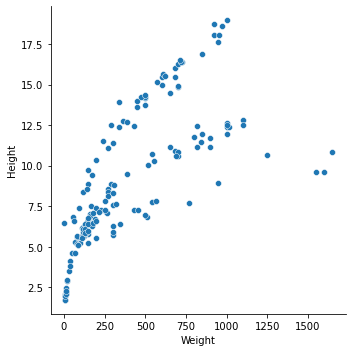

In [10]:
sns.relplot(x="Weight",y="Height", data=dataset)

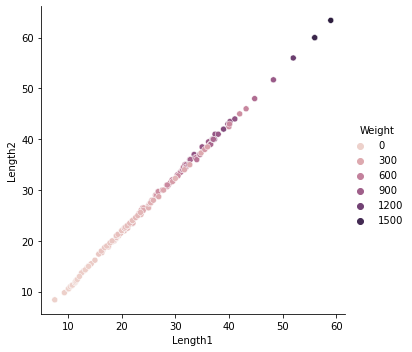

In [11]:
sns.relplot(x = "Length1", y = "Length2", hue= "Weight", data = dataset)

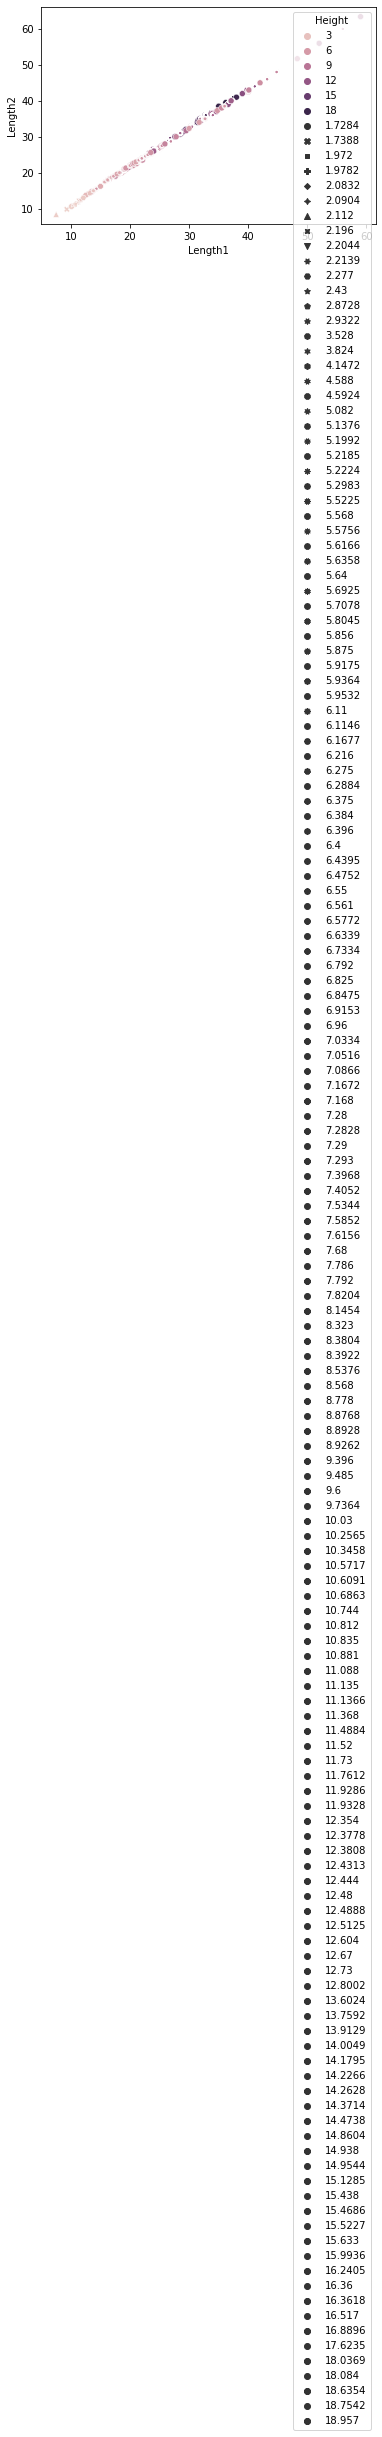

In [12]:
sns.scatterplot(x = "Length1", y = "Length2", hue= "Height", style= "Height", data = dataset);


array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

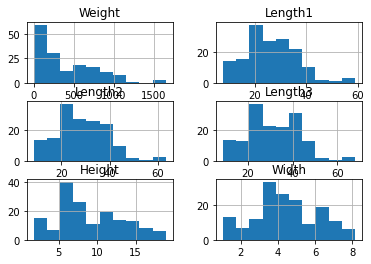

In [13]:
dataset.hist()

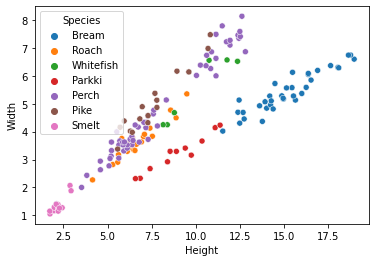

In [14]:
sns.scatterplot(x = "Height", y = "Width", hue= "Species", data = dataset);

In [15]:
dataset.groupby('Species')['Height'].mean()

Species
Bream        15.183211
Parkki        8.962427
Perch         7.861870
Pike          7.713771
Roach         6.694795
Smelt         2.209371
Whitefish    10.027167
Name: Height, dtype: float64

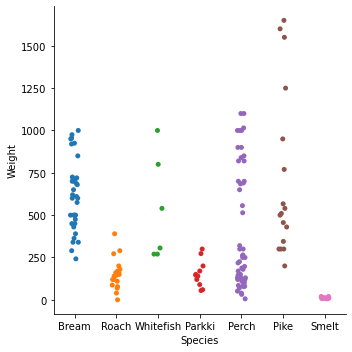

In [16]:
sns.catplot(x='Species',y='Weight',data=dataset);

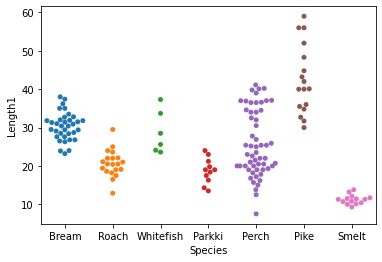

In [17]:
sns.swarmplot(y = "Length1", x = "Species", data =dataset);

<AxesSubplot:xlabel='Species', ylabel='Weight'>

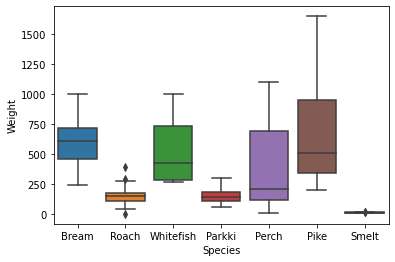

In [18]:
sns.boxplot(x ="Species", y = "Weight", data = dataset)

<AxesSubplot:xlabel='Species', ylabel='Weight'>

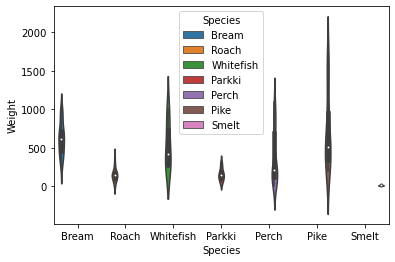

In [19]:
sns.violinplot(x ="Species", y = "Weight", hue = "Species", data = dataset)

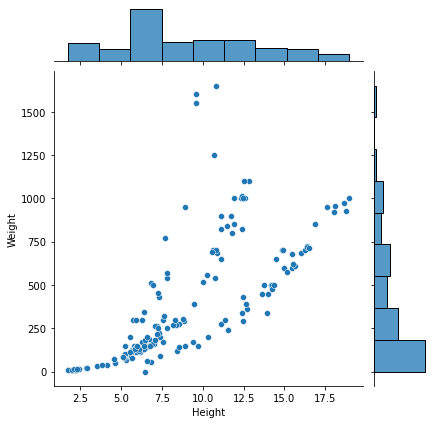

In [20]:
sns.jointplot(x="Height", y="Weight", data=dataset);

In [21]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd


In [22]:
dataset.Species.head()

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

In [23]:
dataset.groupby('Height')['Species'].describe()

,count,unique,top,freq
Height,,,,
1.7284,1,1,Smelt,1
1.7388,1,1,Smelt,1
1.9720,1,1,Smelt,1
1.9782,1,1,Smelt,1
2.0832,1,1,Smelt,1
...,...,...,...,...
18.0369,1,1,Bream,1
18.0840,1,1,Bream,1
18.6354,1,1,Bream,1


In [24]:
pd.get_dummies(data=dataset)

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [25]:
dataset_final = pd.get_dummies(data=dataset, drop_first=True)

In [26]:
dataset_final.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [27]:
X = dataset_final[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish']]
y = dataset_final['Species_Smelt']



In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [29]:
clf = LogisticRegression(random_state=0)

In [30]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [54]:
pred = clf.predict(X_test)

In [32]:
clf.score(X_train, y_train)

1.0

In [33]:
clf.score(X_test, y_test)

1.0

In [52]:
y_test

78     0
155    1
128    0
55     0
94     0
29     0
147    1
51     0
98     0
141    0
19     0
60     0
15     0
65     0
24     0
30     0
126    0
101    0
96     0
16     0
151    1
18     0
12     0
9      0
31     0
125    0
95     0
56     0
145    1
152    1
135    0
76     0
Name: Species_Smelt, dtype: uint8

In [49]:
#pred=clf.predict_proba(X_test)[:,1]

In [55]:
pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=uint8)

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train).predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=uint8)

In [36]:
gnb.score(X_test, y_test)


1.0

In [37]:
#Performace Evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[27  0]
 [ 0  5]]


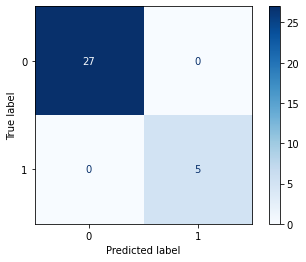

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,cmap='Blues')
plt.grid(False)

In [39]:
total=sum(sum(cm))

In [40]:
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0


In [41]:
m_rate = (cm[0,1]+cm[1,0])/total
print("Misclassification rate : ", m_rate)

Misclassification rate :  0.0


In [42]:
from sklearn import metrics

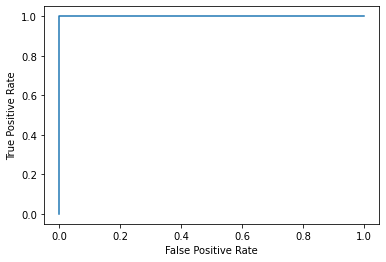

In [43]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
print("AUROC : ",metrics.auc(fpr, tpr))

AUROC :  1.0


In [45]:
from sklearn.metrics import classification_report

In [56]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        27\n           1       1.00      1.00      1.00         5\n\n    accuracy                           1.00        32\n   macro avg       1.00      1.00      1.00        32\nweighted avg       1.00      1.00      1.00        32\n'